# Exercise 4 | Applications of Data Analysis


## Water permability prediction in forestry <br>

In this task, the client wants you to estimate the spatial prediction performance of K-nearest neighbor regression model with K=5 (5NN), using spatial leave-one-out cross-validation (i.e. SKCV, with number of folds == number of data points). The client wants you to use the C-index as the performance measure.  

In other words, the client wants you to answer the question: "What happens to the prediction performance of water permeability using 5-nearest neighbor regression model, when the geographical distance between known data and unknown data increases?".

In this task, you have three data files available (with 1691 data points): 

- input.csv, contains the 95 predictor features. 
- output.csv, contains the water permebility values. 
- coordinates.csv, contains the corresponding geographical coordinate locations of the data points. The unit of the coordinates is metre, and you can use Euclidean distance to calculate distances between the coordinate points. 

Implement the following tasks to complete this exercise:

********************************************

#### 1. Z-score standardize the predictor features (input.csv). 

#### 2. Perform spatial leave-one-out cross-validation with 5NN model for the provided data set (check the end of the lecture slides for the pseudocode). Estimate the water permeability prediction performance (using 5NN model and C-index) with the following distance parameter values: d = 0, 10, 20, ..., 250 (that is, 10 meter intervals). 

#### 3. When you have calculated the C-index performance measure for each value of d, visualize the results with the C-index (y-axis) as a function of d (x-axis).

********************************************

Your .ipynb-file must include the following: 

- Your own implementation of the spatial leave-one-out cross-validation for the current task. Remember to also take advantage of earlier exercises (e.g. C-index). For the 5-nearest neighbor and Euclidean distance you can use third-party libraries if you want.  


- Plot of the graph C-index vs. distance parameter value. 

<br><br><br>
-- START IMPLEMENTING YOUR EXERCISE AFTER THIS LINE --
<br><br><br>

### Import necessary libraries

In [1]:
# In this cell, import all the libraries that you need. For example: 
import numpy as np
from scipy import stats
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as pltp
from scipy.spatial import distance

### Read in the datasets

In [2]:
# In this cell, read the files input.csv, output.csv and coordinates.csv.
# Print out the dataset dimesions (i.e. number of rows and columns).
#
# Note that the coordinates are in EUREF-TM35FIN format, so you 
# can use the Euclidean distance to calculate the distance between two coordinate points. 

input_data = np.genfromtxt('INPUT.csv', delimiter=',')
output_data = np.genfromtxt('OUTPUT.csv', delimiter=',')
coordinates = np.genfromtxt('COORDINATES.csv', delimiter=',')

print('Input dimensions:', input_data.shape)
print('Output dimensions:', output_data.shape)
print('Coordinates dimensions:', coordinates.shape)


Input dimensions: (1691, 95)
Output dimensions: (1691,)
Coordinates dimensions: (1691, 2)


### Standardization of the predictor features (input.csv)

In [3]:
# Standardize the predictor features (input.csv) by removing the mean and scaling to unit variance. 
# In other words, z-score the predictor features. You are allowed to use third-party libraries for doing this. 
input_z = stats.zscore(input_data)

### Functions

In [4]:
# Include here all the functions (for example the C-index-function) that you need in order to implement the task.
def cindex(true_labels, predictions):
    n = 0
    h_sum = 0

    for i in range (len(true_labels)):
        t = true_labels[i]
        p = predictions[i]
        j= i+1
        for j in range(len(true_labels)):
            nt = true_labels[j]
            np = predictions[j]
            if t != nt:
                n = n + 1
                if (p < np and t < nt) or (p > np and t > nt):
                    h_sum = h_sum + 1
                elif p == np:
                    h_sum = h_sum + 0.5
    cindx = h_sum/n
    return cindx

### Results for spatial leave-one-out cross-validation with 5-nearest neighbor regression model

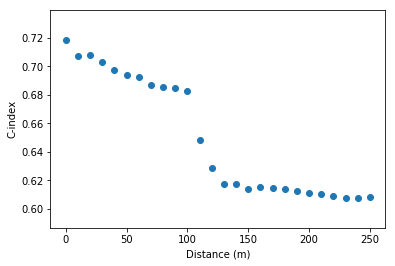

In [5]:
# In this cell, run your script for the Spatial leave-One-Out cross-validation 
# with 5-nearest neighbor regression model and visualize the results as 
# requested in the task assignment.

# distance values
d_range = np.arange(0, 260,10).tolist()

c_index_array = []

#Calculate all pairwise distances using euclidean distance
dist = distance.cdist(coordinates, coordinates, 'euclidean')

for D in d_range:
    
    true=[]
    pred=[]
    for z in range(len(coordinates)):
            
            idx=[]
            
            # Find all neighbors index that are inside the distance D
            for i in range(len(coordinates)):
                if dist[z,i] <= D:
                    idx.append(i)
                    
            
            # delete all neighbors too close (test set included) 
            input_train = np.delete(input_z, (idx), axis=0)
            output_train = np.delete(output_data, (idx), axis=0)
            
            # use the remaining as training set for the prediction using knn 5 regression
            knn5 = KNeighborsRegressor(n_neighbors=5)
            knn5.fit(input_train, output_train)
        
            prediction = knn5.predict([input_z[z]])
                    
            #add true and prediciton values to arrays
            true.append(output_data[z])
            pred.append(prediction)
                    
                

    #calculate c-index for each distance D and add to array                
    c_index = cindex(output_data, pred)
    c_index_array.append(c_index)


# Create scatter plot of C-index performance as a function of the distance D 
pltp.scatter(d_range, c_index_array)
pltp.xlabel('Distance (m)')
pltp.ylabel('C-index')
pltp.show()

### Interpretation of the results

In [6]:
# In this cell, give a brief commentary on the results, what happens to the prediction 
# performance as the prediction distance increases?

# From the results we can see that the C-index performance decreases as the distance grows
# and after the distance goes over 100m, the C-index performance starts to decrease rapibly.
# To me it seems that the results are to close to expected.